In [72]:
print("Hello")

Hello


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
pd.pandas.set_option("display.max_columns",None)
df=pd.read_csv("EasyVisa.csv")
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [74]:
df.shape

(25480, 12)

In [75]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [76]:
features_with_na=[feature for feature in df.columns if df[feature].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5),"%missing value")

In [77]:
features_with_na

[]

In [78]:
df.duplicated().sum()

0

In [79]:
df.drop('case_id',inplace=True,axis=1)

In [80]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [81]:
from datetime import date
todays_date=date.today()
current_year=todays_date.year

In [82]:
todays_date

datetime.date(2024, 11, 27)

In [83]:
current_year

2024

In [84]:
df['company_age']=current_year-df['yr_of_estab']

In [85]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,17
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,22
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,16
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,127
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,19


In [86]:
df.drop('yr_of_estab',inplace=True,axis=1)

In [87]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Number of Numerical columns:', len(num_features))

Number of Numerical columns: 3


In [88]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Number of categorical columns:', len(cat_features))

Number of categorical columns: 8


In [89]:
discreat_feature=[feature for feature in num_features if len(df[feature].unique())<=25]
print("Number of discreate columns :",len(discreat_feature))

Number of discreate columns : 0


In [90]:
continuous_feature=[feature for feature in num_features if len(df[feature].unique())>25]
print("Number of continuous columns :",len(continuous_feature))

Number of continuous columns : 3


In [91]:
x=df.drop('case_status',axis=1)
y=df['case_status']

In [92]:
y.head()

0       Denied
1    Certified
2       Denied
3       Denied
4    Certified
Name: case_status, dtype: object

In [93]:
y=np.where(y=='Denied',1,0)

In [94]:
y

array([1, 0, 1, ..., 0, 0, 0])

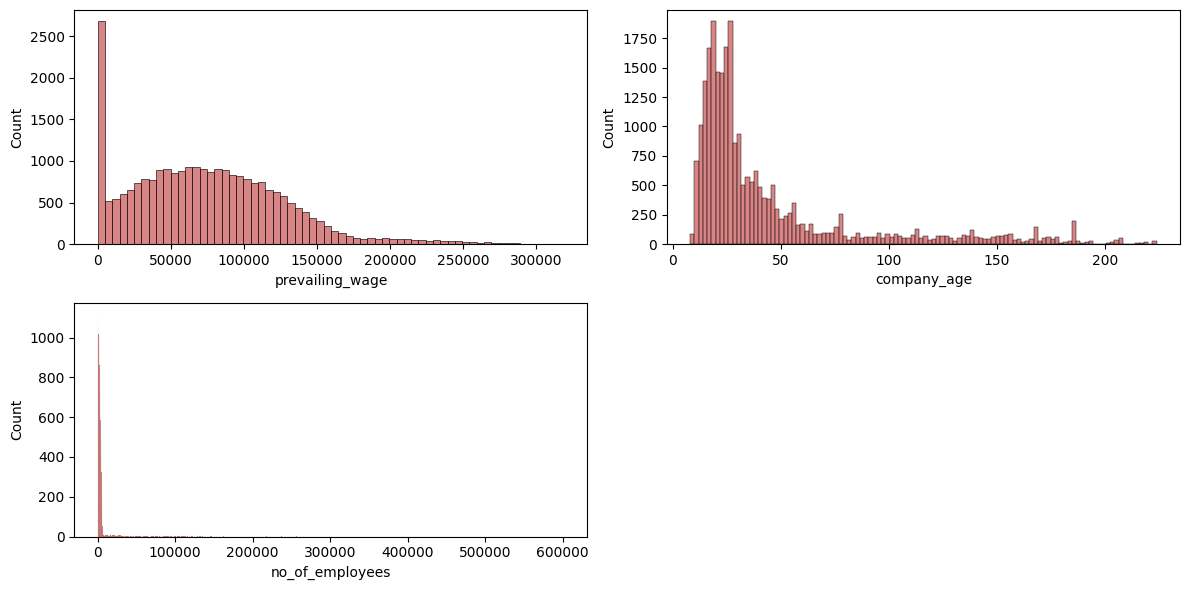

In [95]:
plt.figure(figsize=(12,6))
for i,col in enumerate(['prevailing_wage','company_age','no_of_employees']):
    plt.subplot(2,2,i+1)
    sns.histplot(x=x[col],color="indianred")
    plt.xlabel(col)
    plt.tight_layout()

In [96]:
x[continuous_feature].skew(axis=0,skipna=True)

no_of_employees    12.265260
prevailing_wage     0.755776
company_age         2.037301
dtype: float64

In [97]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
transform_features=['company_age','no_of_employees']
x_copy=pt.fit_transform(x[transform_features])

In [98]:
x_copy=pd.DataFrame(x_copy,columns=transform_features)

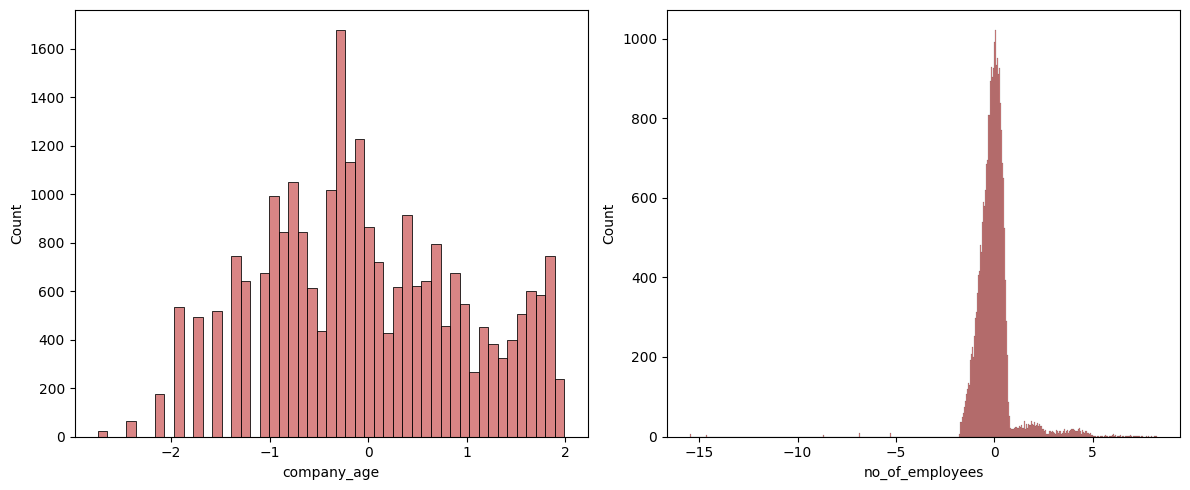

In [99]:
plt.figure(figsize=(12,5))
for i,col in enumerate(transform_features):
    plt.subplot(1,2,i+1)
    sns.histplot(x=x_copy[col],color="indianred")
    plt.xlabel(col)
    plt.tight_layout()

In [100]:
x_copy.skew(axis=0,skipna=True)

company_age        0.103265
no_of_employees    0.399339
dtype: float64

In [101]:
for feature in cat_features:
    print(feature,':',df[feature].nunique())

continent : 6
education_of_employee : 4
has_job_experience : 2
requires_job_training : 2
region_of_employment : 5
unit_of_wage : 4
full_time_position : 2
case_status : 2


In [ ]:
or_columns=['has_job_experience','requires_job_training','full_time_position','education_of_employee ']
oh_columns=['continent','unit_of_wage','region_of_employment']
transform_column=['no_of_employee','company_age']

from sklearn.preprocessing import OneHotEncoder,StandardScaler,OrdinalEncoder,PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder
ordinal_encoder=OrdinalEncoder()

transform_pipe=Pipeline(steps=[
    ('transformer',PowerTransformer(method='yeo-johnson'))
])
preprocessor=ColumnTransformer(
    [
        ('OneHotEncoder',oh_transformer,oh_columns),
        ('Ordinal_Encoder',ordinal_encoder,or_columns),
        ('Transformers',transform_pipe,transform_column),
        ('StandardSclar',numeric_transformer,num_features)
    ]
)